In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import librosa

In [2]:
SAMPLE_RATE = 48000
SEGMENT_DURATION = int(1 * SAMPLE_RATE)
OVERLAP_DURATION = int(0.5 * SAMPLE_RATE)

In [3]:
# Ubah ini aja
dir_data_xc = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\xeno-canto"

In [4]:
def load_and_plot(path, list_result):
    audio, sr = librosa.load(path, sr=SAMPLE_RATE)
    time_axis = np.linspace(0, len(audio) / sr, len(audio))

    plt.figure(figsize=(20, 4))
    plt.plot(time_axis, audio, label="Amplitude")
    plt.title("Audio waveform with loud segments marked")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    for i in enumerate(list_result):
        start_time = i[1][0]
        end_time = i[1][1]
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)

    plt.xticks(np.arange(0, 25.1, 0.5))
    plt.grid(which='both', alpha=0.5)
    plt.xlim(0, 25)
    plt.ylim(-1, 1)
    plt.tight_layout()
    plt.legend()
    plt.show()

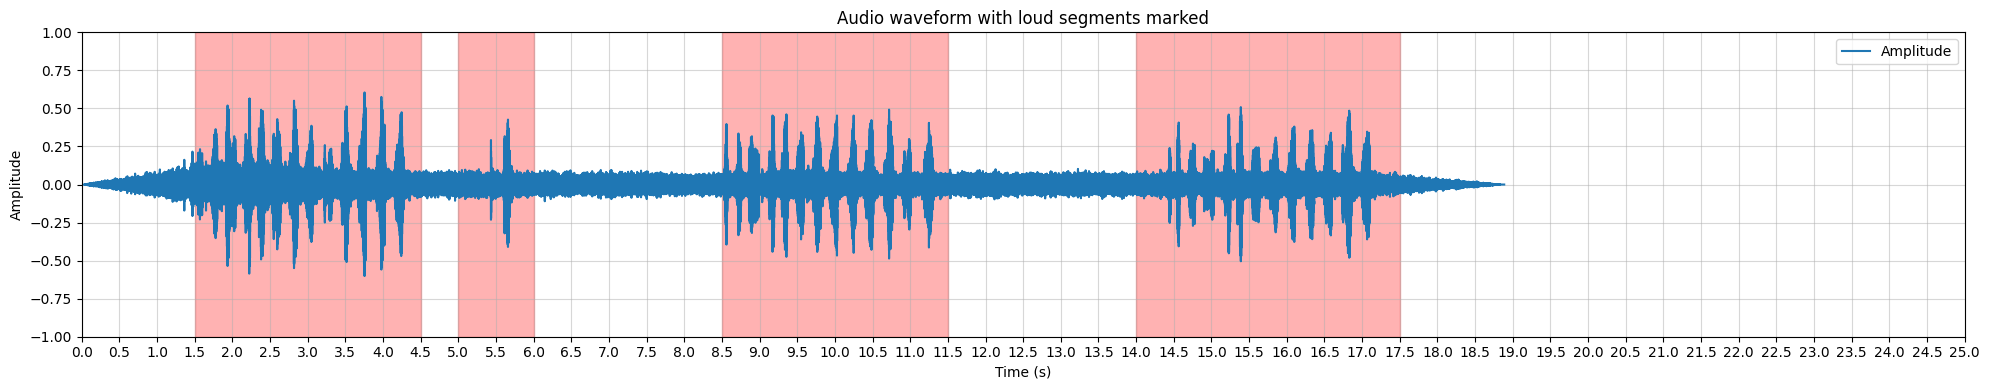

In [5]:
load_and_plot(dir_data_xc+"/19655.mp3",[[1.5, 4.5], [5.0, 6.0], [8.5, 11.5], [14.0, 17.5]])

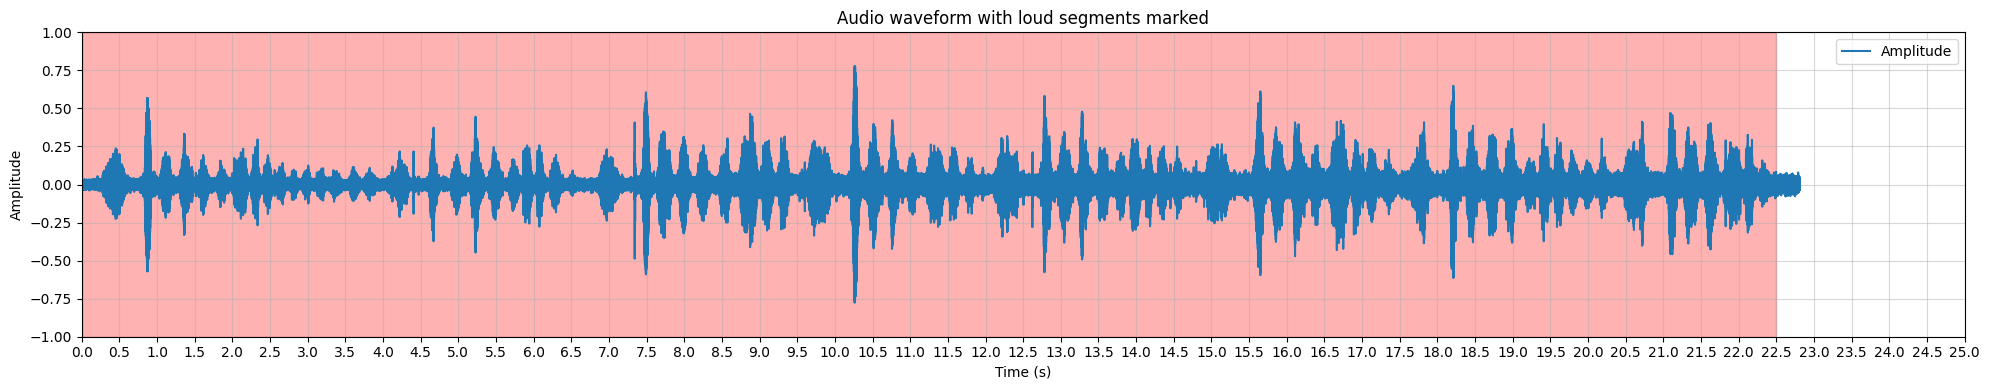

In [6]:
load_and_plot(dir_data_xc+"/90809.mp3",[[0.0, 22.5]])

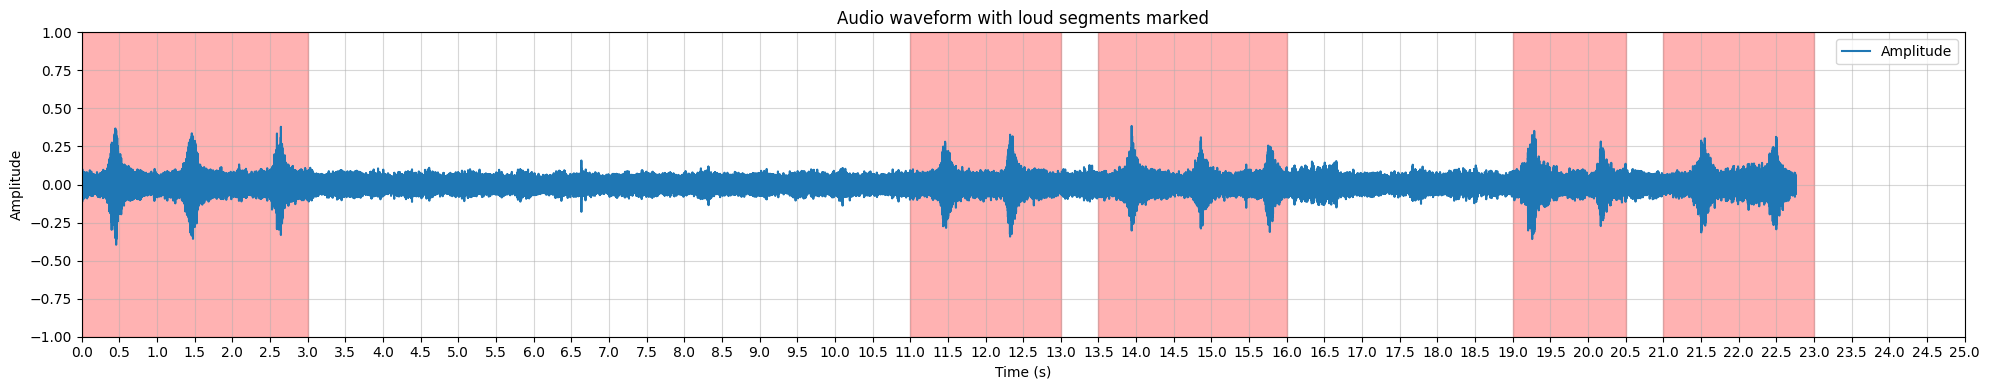

In [7]:
load_and_plot(dir_data_xc+"/151761.mp3",[[0.0, 3.0], [11.0, 13.0], [13.5, 16.0], [19.0, 20.5], [21.0, 23.0]])

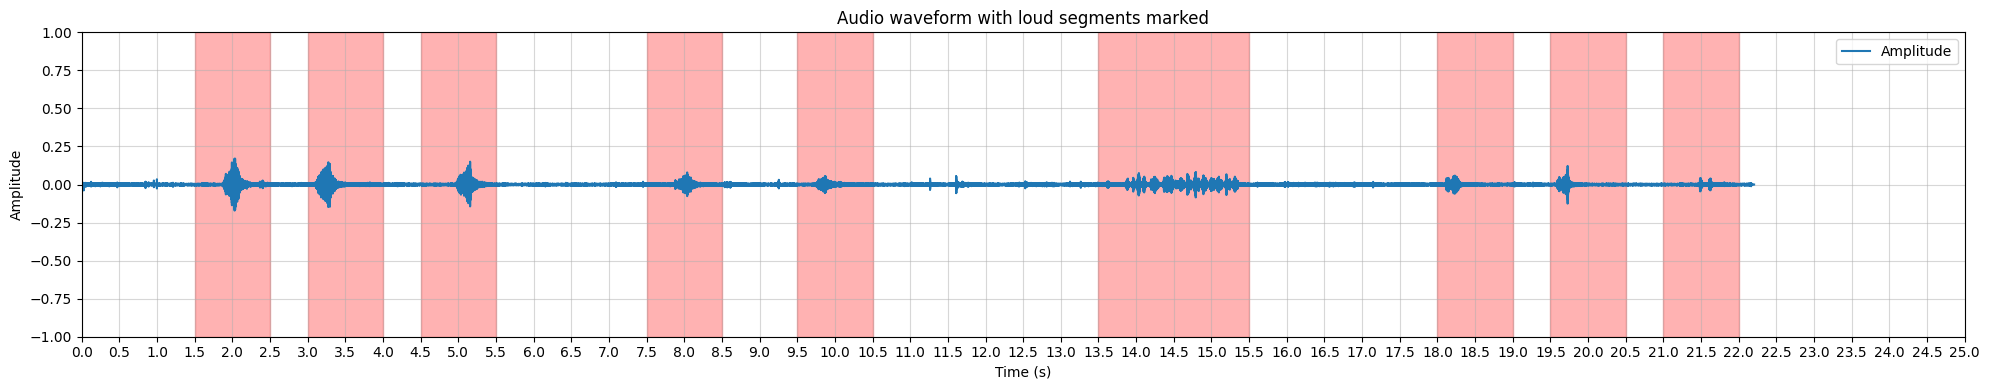

In [8]:
load_and_plot(dir_data_xc+"/193835.mp3",[[1.5, 2.5], [3.0, 4.0], [4.5, 5.5], [7.5, 8.5], [9.5, 10.5], [13.5, 15.5], [18.0, 19.0], [19.5, 20.5], [21.0, 22.0]])

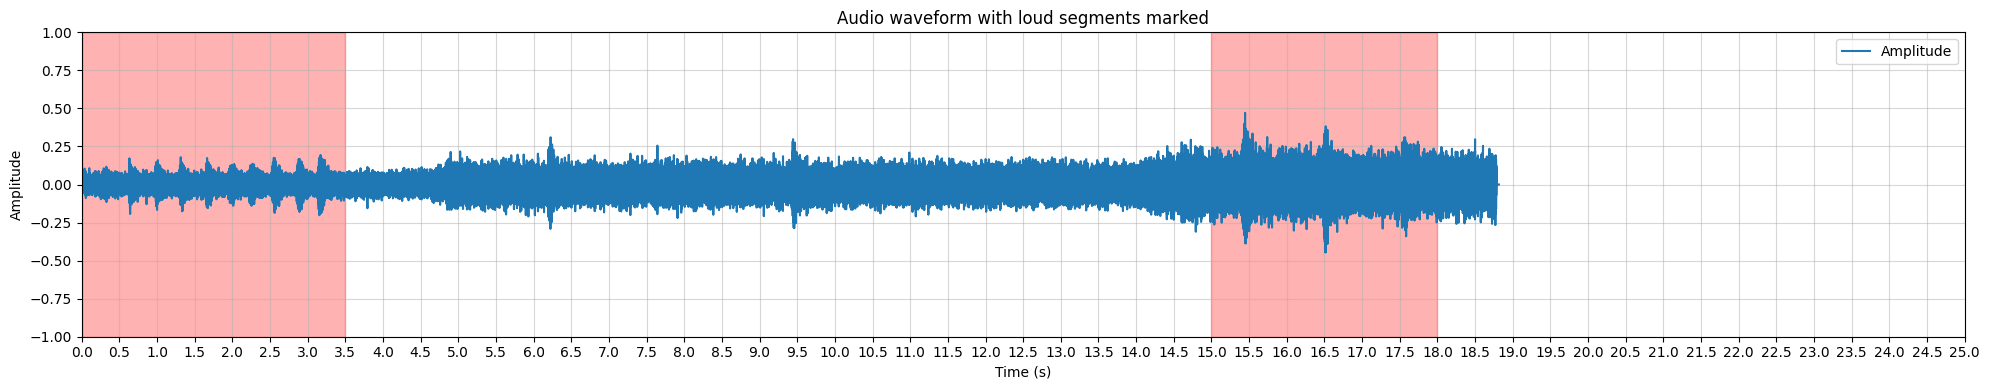

In [9]:
load_and_plot(dir_data_xc+"/279210.mp3",[[0.0, 3.5], [15.0, 18.0]])

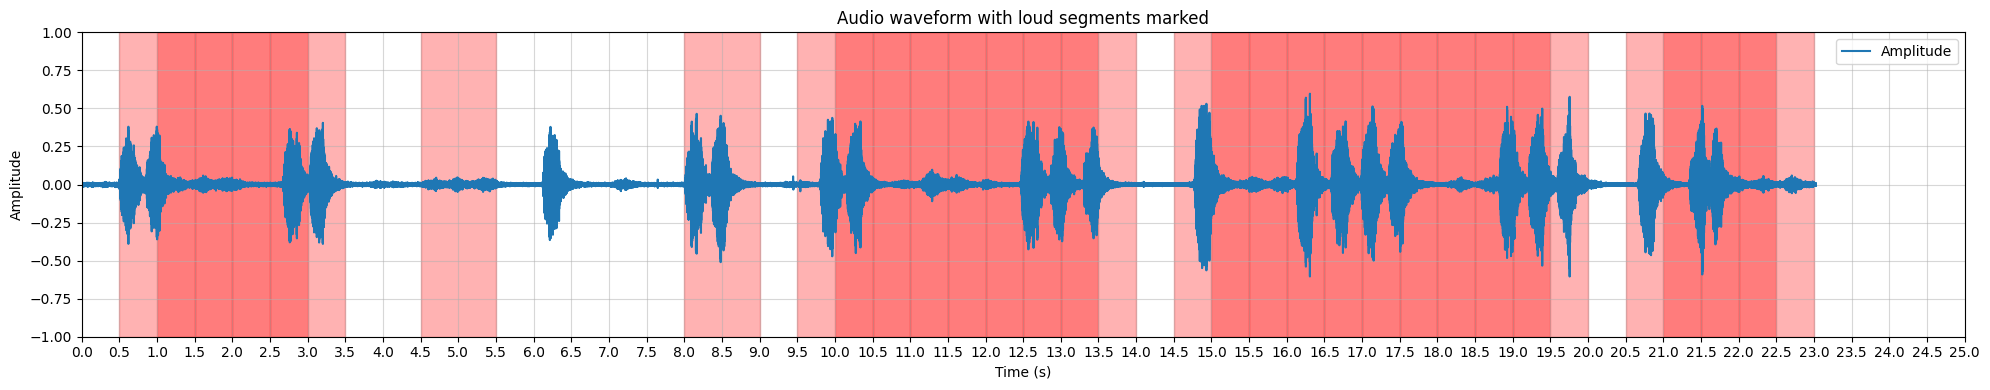

In [10]:
load_and_plot(dir_data_xc+"/282469.mp3",[[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [4.5, 5.5], [8.0, 9.0], [9.5, 10.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [12.5, 13.5], [13.0, 14.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [20.5, 21.5], [21.0, 22.0], [21.5, 22.5], [22.0, 23.0]])

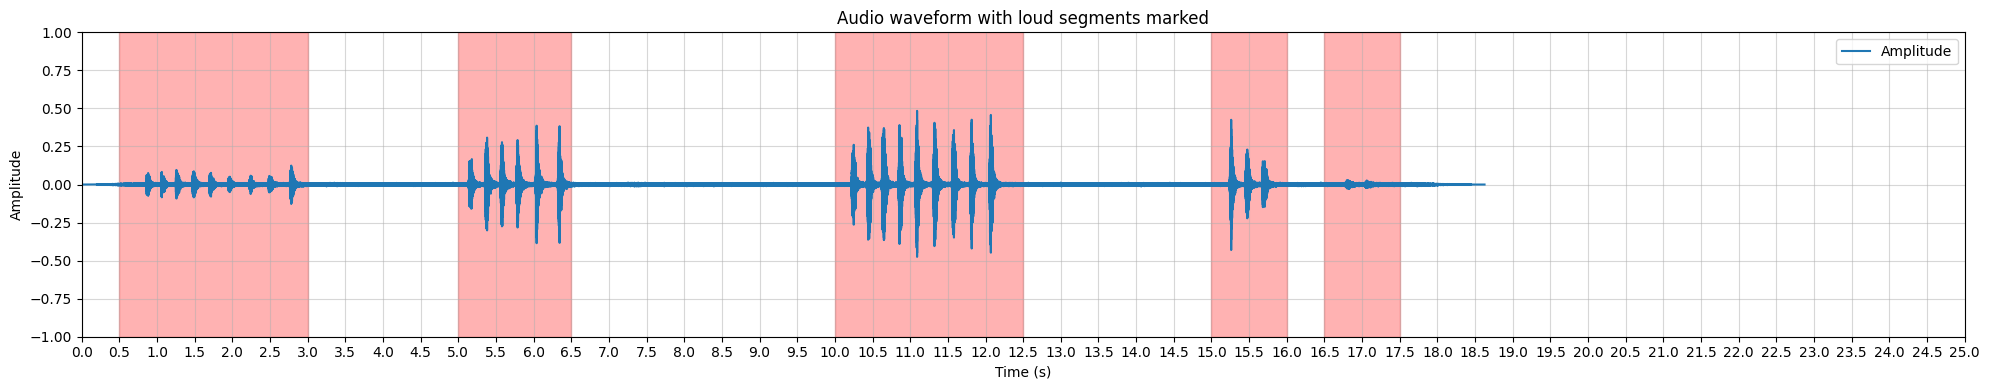

In [11]:
load_and_plot(dir_data_xc+"/359523.mp3",[[0.5, 3.0], [5.0, 6.5], [10.0, 12.5], [15.0, 16.0], [16.5, 17.5]])

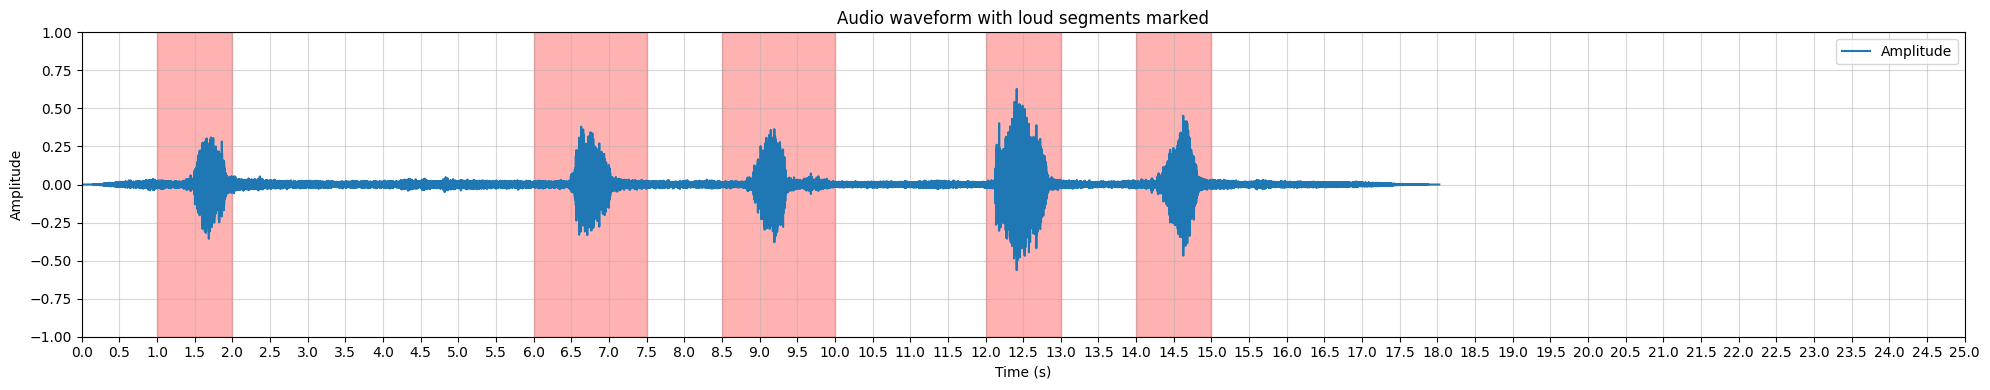

In [12]:
load_and_plot(dir_data_xc+"/359552.mp3",[[1.0, 2.0], [6.0, 7.5], [8.5, 10.0], [12.0, 13.0], [14.0, 15.0]])

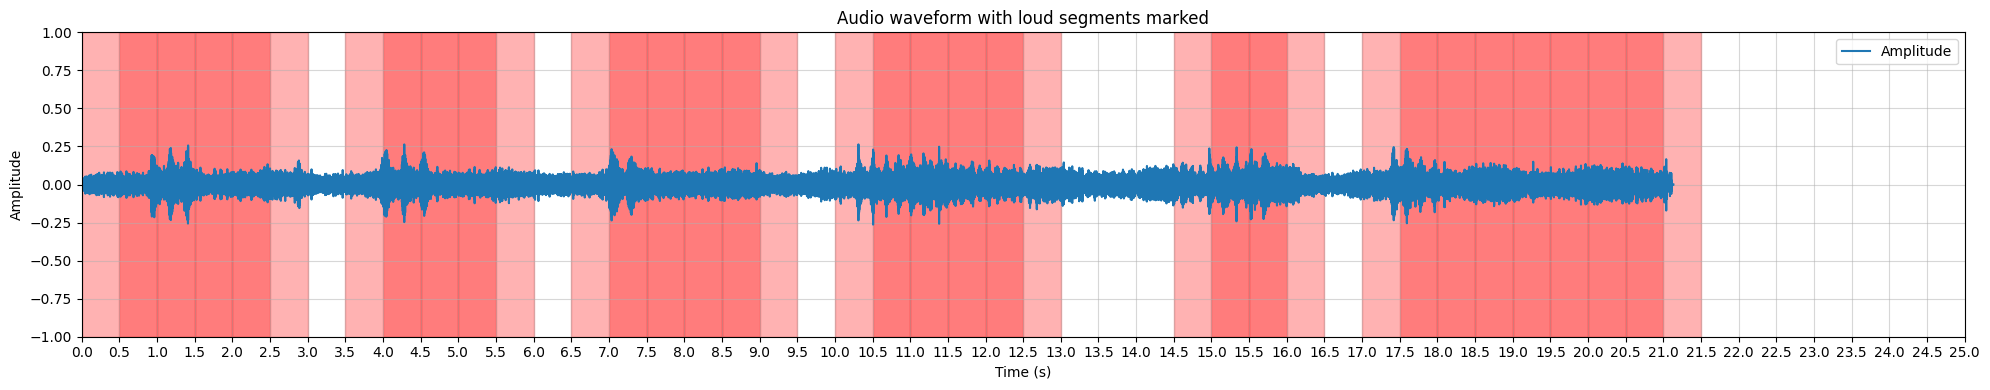

In [13]:
load_and_plot(dir_data_xc+"/498380.mp3",[[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [3.5, 4.5], [4.0, 5.0], [4.5, 5.5], [5.0, 6.0], [6.5, 7.5], [7.0, 8.0], [7.5, 8.5], [8.0, 9.0], [8.5, 9.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0], [20.5, 21.5]])

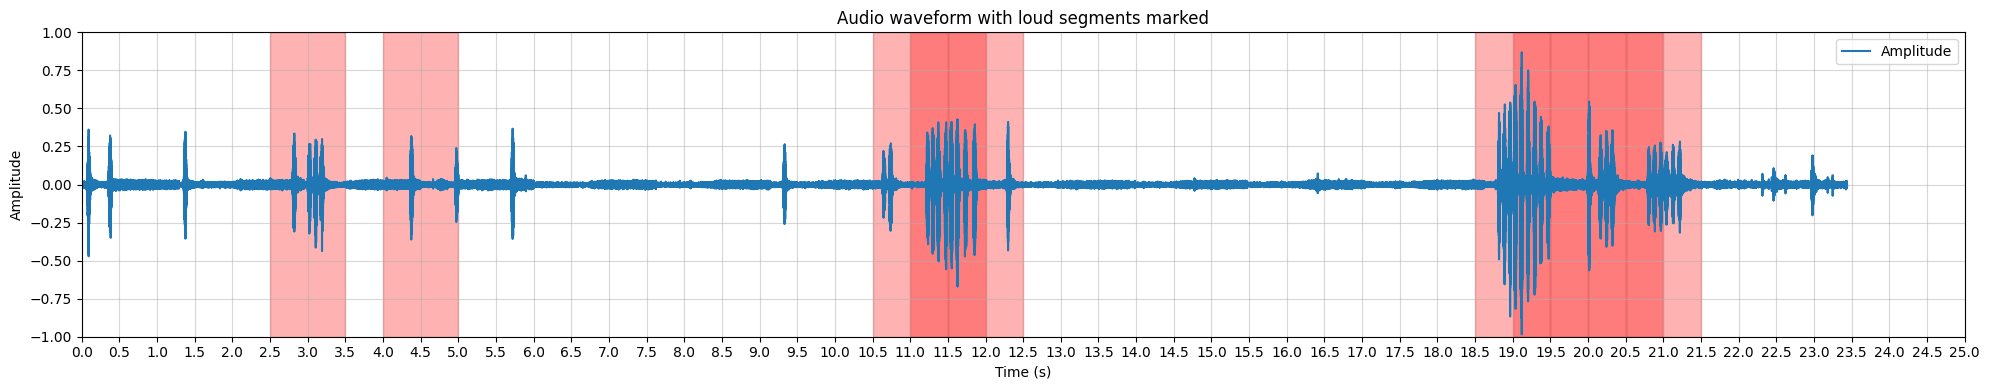

In [14]:
load_and_plot(dir_data_xc+"/505545.mp3",[[2.5, 3.5], [4.0, 5.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0], [20.5, 21.5]])

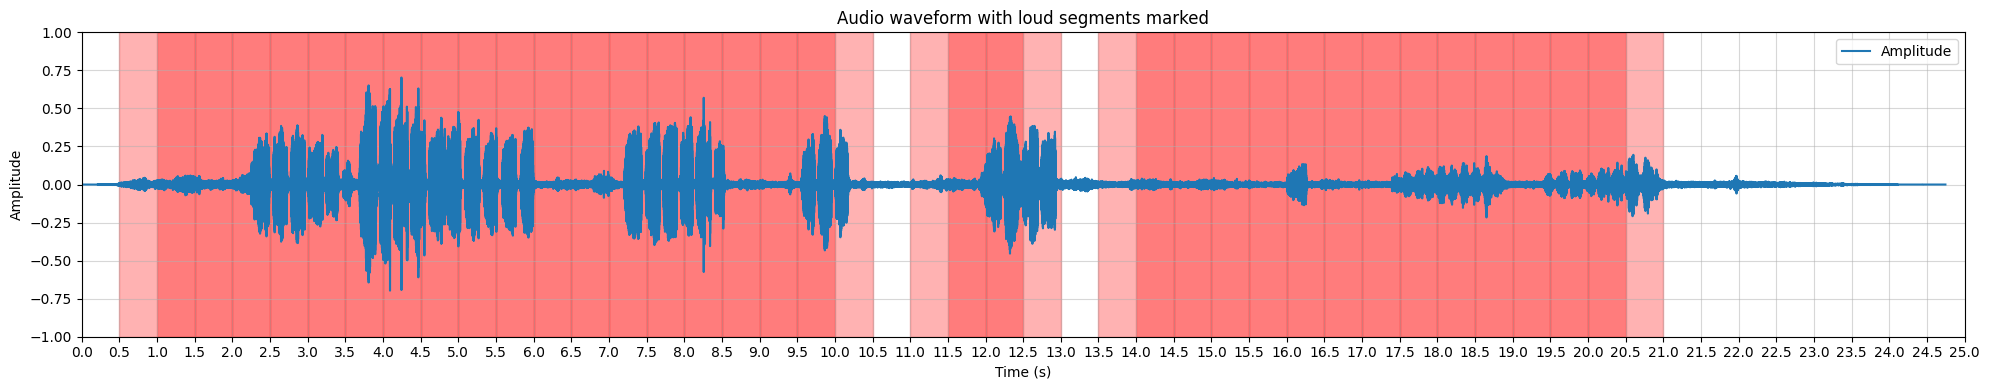

In [15]:
load_and_plot(dir_data_xc+"/531042.mp3",[[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0], [4.5, 5.5], [5.0, 6.0], [5.5, 6.5], [6.0, 7.0], [6.5, 7.5], [7.0, 8.0], [7.5, 8.5], [8.0, 9.0], [8.5, 9.5], [9.0, 10.0], [9.5, 10.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [13.5, 14.5], [14.0, 15.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0]])

In [16]:
def label_to_segments(list_label):
    segments = []
    for label in list_label:
        start, end = label
        if end - start == 1:
            segments.append([start, end])
        else:
            current = start
            while current + 1 <= end:
                segments.append([current, current + 1])
                current += 0.5
    return segments